In [1]:
import os
import sys

sys.path.append("/home/yuri/github.com/AoesJP/project_pokereader")
sys.path

['/home/yuri/.pyenv/versions/3.10.6/lib/python310.zip',
 '/home/yuri/.pyenv/versions/3.10.6/lib/python3.10',
 '/home/yuri/.pyenv/versions/3.10.6/lib/python3.10/lib-dynload',
 '',
 '/home/yuri/.pyenv/versions/3.10.6/envs/project_pokereader/lib/python3.10/site-packages',
 '/home/yuri/github.com/AoesJP/project_pokereader']

In [2]:
from pathlib import Path
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

import pyocr
from PIL import Image, ImageEnhance, ImageOps, ImageFilter

import pokedex.utils_dataset as pku
import pokedex.augmentation as pka
from pokedex.edges import deformer, draw

2024-05-22 16:44:00.610679: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-22 16:44:01.278072: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
PROJECT_PATH = Path(".").absolute().parent
DATA_PATH = PROJECT_PATH / "data"
DATA_PATH

PosixPath('/home/yuri/github.com/AoesJP/project_pokereader/data')

In [4]:
IMG_PATH = DATA_PATH / "pokemon_card.png"
IMG_PATH.as_posix()

'/home/yuri/github.com/AoesJP/project_pokereader/data/pokemon_card.png'

In [5]:
DATA_JSON_PATH = DATA_PATH / "dict_dataset_full.json"
DATA_JSON_PATH

PosixPath('/home/yuri/github.com/AoesJP/project_pokereader/data/dict_dataset_full.json')

In [6]:
DATA_JSON_LEFT = DATA_PATH / "dict_dataset_full.json"

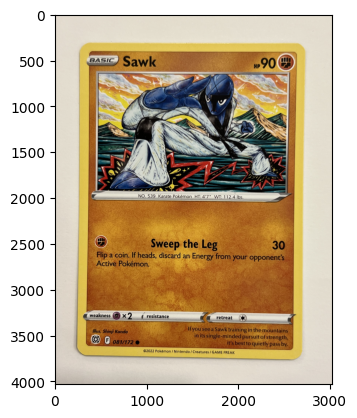

In [56]:
# img_path = str(DATA_PATH / "IMG_1460.jpeg")
# img_path = str(DATA_PATH / "white_bg/dv1-2.jpg")
img_path = str(DATA_PATH / "white_bg/IMG_1498.jpeg")
img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
draw.show_color(img)

In [57]:
def crop_card(card_image):
    """
    Input is a numpy array
    crop to (72, 184)
    """

    h, w, d = card_image.shape
    bottomleft = card_image[h - 72 :, :184, :]
    bottomright = card_image[h - 72 :, w - 184 :, :]

    return bottomleft, bottomright

In [71]:
def crop_padding(img: np.ndarray, side: int = 0, padding=28):
    h, w, d = img.shape
    result = img[: h - padding, : w - padding, :] if side else img[: h - padding, padding:, :]
    return result

In [80]:
def ocr_text(img):
    tools = pyocr.get_available_tools()
    tool = tools[0]
    tool
    builder = pyocr.builders.TextBuilder(tesseract_layout=6)
    # builder.tesseract_configs.append("digits")
    builder.tesseract_configs.append("-c")
    builder.tesseract_configs.append("tessedit_char_whitelist=0123456789/")
    builder.tesseract_configs.append("--psm")
    builder.tesseract_configs.append("6")  # 0~13
    builder.tesseract_configs.append("--oem")
    builder.tesseract_configs.append("3")  # 0~3
    if isinstance(img, np.ndarray):
        img = Image.fromarray(img)
    res = tool.image_to_string(img, lang="eng", builder=builder)
    # res = tool.image_to_string(img_gray, builder=builder)

    return res

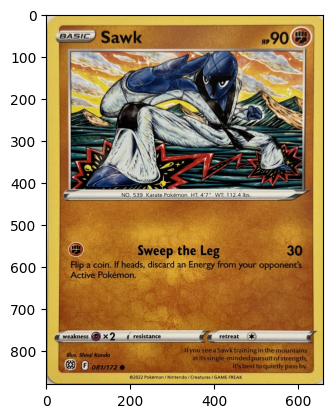

In [72]:
deformed_img = deformer.deform_card(img_path)
plt.imshow(deformed_img)

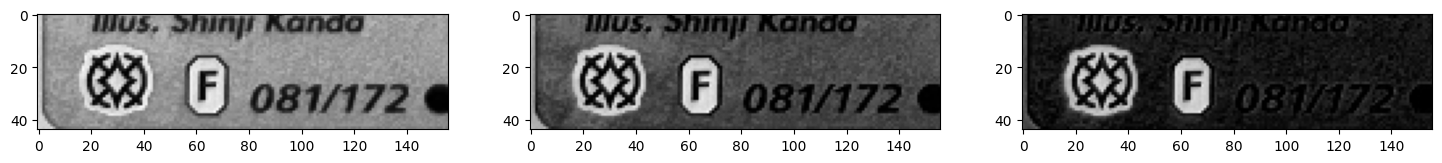

In [73]:
img_cropped = crop_padding(crop_card(deformed_img)[0])
draw.show_channels(img_cropped)

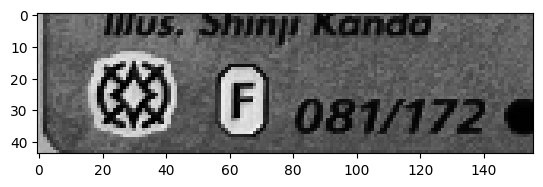

In [76]:
deformed_img_grey = cv2.cvtColor(img_cropped, cv2.COLOR_RGB2GRAY)
draw.show_grey(deformed_img_grey)

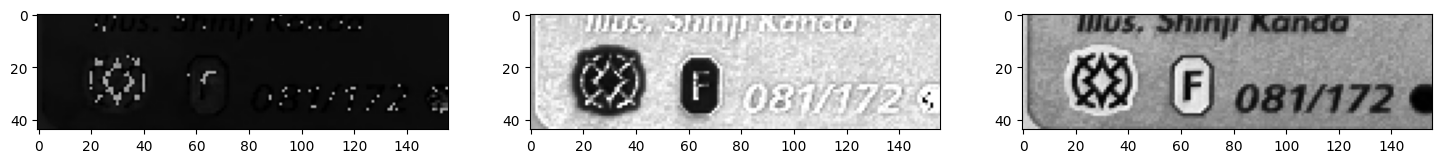

In [78]:
deformed_img_hsv = cv2.cvtColor(img_cropped, cv2.COLOR_RGB2HSV)
draw.show_channels(deformed_img_hsv)

In [81]:
ocr_text(deformed_img_grey)

'6'